# `eeg-01`: Data visualization
This demo introduces the basics of EEG visualization using an example dataset. We'll inspect raw (and processed) EEG data for artifacts, and visualization the location of EEG electrodes.

In [12]:
import os
import matplotlib.pyplot as plt
from mne.io import read_raw_fif

### Loading data
We'll load in a simple EEG dataset acquired while a subject received visual and auditory stimuli. The data stored as [`.fif`](https://bids-specification.readthedocs.io/en/stable/99-appendices/06-meg-file-formats.html#neuromagelektamegin) file format commonly used with MEG. The resulting [`Raw`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) data object has a variety of useful attributes and methods.

In [13]:
# Specify path to raw data
raw_fn = '../eeg-data/sub-01_task-audvis_raw.fif'

# Load raw data
data_raw = read_raw_fif(raw_fn, preload=True, verbose=False)
print(data_raw)

<Raw | sub-01_task-audvis_raw.fif, 70 x 166800 (277.7 s), ~92.1 MB, data loaded>


### Inspecting the raw data
It can be useful to inspect the raw data across a variety of frequencies. Certain artifacts will be present at all frequencies; e.g. EOG (electrooculogram) artifacts generated by eyeblinks. Other artifacts are prominent only at selective frequencies. Line noise, for example, will be prominent at 60 Hz (in America). EMG (electromyogram) artifacts caused by facial muscles tends to impact the higher frequencies (roughly >50 Hz).

In [18]:
%matplotlib osx
data_raw.plot();

Channels marked as bad: none


### Inspecting preprocessed data
To provide some contrast, we'll also inspect preprocessed data (more on preprocessing in the next demo). For now, we can take for granted that filtering and artifact removal have been applied to the raw data.

In [19]:
# Specify path to preprocessed data
prep_fn = '../eeg-data/sub-01_task-audvis_preproc_raw.fif'

## Load preprocessed data
data_prep = read_raw_fif(prep_fn, preload=True, verbose=False)
print(data_prep)

<Raw | sub-01_task-audvis_preproc_raw.fif, 70 x 166800 (277.7 s), ~92.1 MB, data loaded>


In [20]:
%matplotlib osx
data_prep.plot();

Channels marked as bad: ['EEG 053']


### Channel layout
To get a sense of where the sensors/electrodes are located on the subject's head, we can extract the channel layout from the data and plot the locations. We can also plot standardized ("idealized") channel locations (e.g. the [10-20 system](https://en.wikipedia.org/wiki/10%E2%80%9320_system_(EEG))).

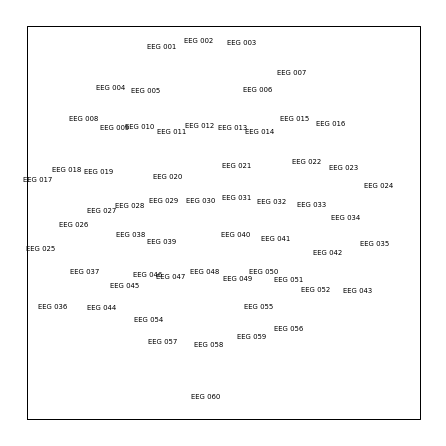

In [23]:
from mne.channels import find_layout
from mne.viz import plot_layout

# Extract channel layout from data object
layout = find_layout(data_prep.info)

# Plot channel layout
%matplotlib inline
plot_layout(layout);

In [24]:
# Create standard 1020 channel locations
from mne.channels import make_standard_montage

ten_twenty_montage = make_standard_montage('standard_1020')
print(ten_twenty_montage)

# Plot standard electrode locations
%matplotlib osx
fig = ten_twenty_montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)
ten_twenty_montage.plot(kind='topomap', show_names=False);

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>
4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.
4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.
